# Знакомство с анализом данных

Возможно ли предсказать вес человека по его росту?

<img src="misc/img1.jpg"/>

Рассмотрим простой датасет - файл лежащий в 'data/dataset.csv'

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('data/dataset.csv')

In [5]:
df.head()

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499762,93.598619


#### Задание 1
В конце прошлого ноутбука вы рисовали график зависимости $y$ от $x$. По аналогии нарисуйте график зависимости **Weight** от **Height**.

Подсказка: Чтоб обратиться ко всем элементам стробца Height, можно написать `df['Height']` (или просто `df.Height`, но этот способ не всегда можно использовать, но синтексически удобнее)

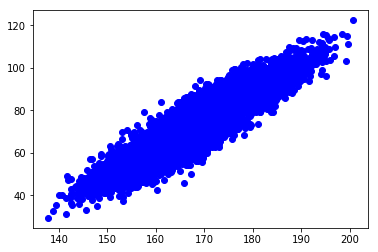

In [6]:
#Ваш код тут

## Построим модель машинного обучения
предсказывающую вес человека по его росту. Для обучения модели будем использовать имеющиеся данные.

<img src="misc/Machine-Learning-hero.jpg" alt="Drawing" style="width: 750px;"/>

In [7]:
#Из sklearn.linear_model импортируем LinearRegression
from sklearn.linear_model import LinearRegression

Поподробнее ознакомится с методом линейной регрессии можно [на википедии](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F). А на [английской википедии](https://en.wikipedia.org/wiki/Linear_regression) есть ещё и хорошие картинки.

### Создадим линейную модель МО

In [8]:
linear_model = LinearRegression()

### Натренируем линейную модель МО

In [9]:
linear_model.fit(X = df[['Height']], y = df['Weight'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Посмотрим предсказание, которое делает данная модель МО

In [10]:
linear_model.predict([[180]])

array([ 88.97534026])

### Разберёмся чему же научилась наша линейная регрессия

Модель МО - линейная регрессия ищет линейную зависимость между $x$ и $y$:<br> 
$$y = a*x+b$$

In [11]:
b = linear_model.intercept_
print('b =', b)

b = -159.09158431


In [12]:
a = linear_model.coef_[0]
print ('a =', a)

a = 1.37814958094


#### Задание 2
Постройте график функции $y = a*x+b$ при $x\in(130,210)$.

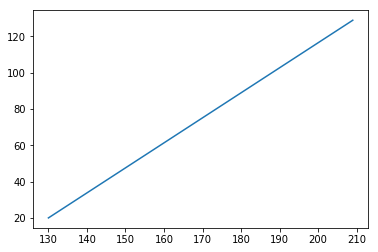

In [13]:
#Ваш код тут

#### Задание 3
Совместите графики из задания 1 и 2 на одном. 

Подсказка. Для второго графика можно считать $x\in$`df['Height']`, $y\in$`linear_model.predict(df[['Height']])`)<br>

In [1]:
#Ваш код тут

После того, как мы всё нарисовали, давайте объясним себе, как работает линейная регрессия.

### С какой точностью работает модель МО?

<img src="misc/dot.png" width="20%">

#### Задание 4
Рассмотрим пример с 5 точками $$x = [1,2,5,6,9], y = [-10,10,30,30,55]$$
Изобрзите на графике точки и результат работы линейной регрессии.

Подсказка: после того, как попробуете скормить $x$ в `fit`, воспользуйтесь следующим:
```
import numpy as np
small_lr_model = LinearRegression()
x_shaped = np.array(x).reshape(-1, 1)
small_lr_model.fit(X = x_shaped, y = y)
```
Расскажите, что произошло с $x$ и почему это надо было сделать?

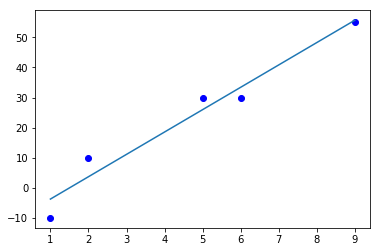

In [15]:
#Ваш код тут

#### Задание 4,5*
Посчитайте MSE - [mean_squared_error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)
$$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$$
и MAE - [mean_absolute_error](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error)
$$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.$$
для этого случая.

Подсказка 1: чтобы проитерироваться по `list` и знать позицию элемента, воспользуйтесь `enumerate(x)`:
```
for i, e in enumerate(x):
    print('y(%d)=%d'% (e, y[i]))
y(1)=-2
y(2)=1
y(5)=4
y(6)=3
y(9)=6
```
Да, иногда удобно пользоваться [формированием строк](https://pythonworld.ru/osnovy/formatirovanie-strok-operator.html).

Подсказка 2: Следующее выражение является истинным `abs(-2) == 2`

In [2]:
#Ваш код тут

Конечно, эти и многие другие страндартные метрики уже реализованы в `sklearn`:

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
y_predicted = small_lr_model.predict(x_shaped)
print ('MSE =', mean_squared_error(y, y_predicted))
print ('MAE =', mean_absolute_error(y, y_predicted))

MSE = 21.4563106796
MAE = 4.1359223301


На самом деле, обычно используется метрика **RMSE**, которая равна $\sqrt MSE$.<br>

In [20]:
print ('RMSE =', (mean_squared_error(y, y_predicted))**(1/2))

RMSE = 4.6320957114


Видно, что RMSE очень похожа на MSE. А вот разница между RMSE и MAE, это уже интересный вопрос, об этом можно почитать [тут](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d).

#### Задача 5
Вернёмся к линейной регрессии предсказывающей вес по росту. Какая получилось точность?

Подсказка: найдите MSE, RMSE и MAE от пары `(weight, weight_predicted)`, где:
```
weight = df['Weight']
weight_predicted = linear_model.predict(df[['Height']])
```

In [21]:
#Ваш код тут

MSE = 30.7164927245
MAE = 4.42103365766
RMSE = 5.54224618043


Давайте подумаем что это значит. Видимо, в среднем, на всей выборке, мы ошибаемся на киллограм 5.

### Вопрос, а как можно улучшить модель МО, чтоб ошибка уменьшилась, т.е. чтоб точность наших предсказаний стала лучше?

Давайте ещё раз посмотрим на данные, которые у нас есть.

In [22]:
df.head()

,Gender,Height,Weight
0,Male,187.571423,109.720985
1,Male,174.706036,73.622732
2,Male,188.239668,96.497550
3,Male,182.196685,99.809504
4,Male,177.499762,93.598619


До этого мы предсказывали вес используя лишь данные о росте. Как думаете, зависит ли вес от пола?

#### Посчитаем средний рост мужчин в имеющимся датасете

`df[df['Gender'] == 'Male']` такая конструкция даст нам выборку только по мужчинам.

`df[df['Gender'] == 'Male']['Height']` как мы уже видели, тут мы смотрим на колонку `Height` в выборке.

Можно использовать функцию, написанную в первом ноутбуке. Подставьте сюда вашу реализацию `arithmetic_mean`:

In [23]:
def arithmetic_mean(lst):
    n = len(lst)
    res = 0
    for e in lst:
        res+=e
    return res/n

arithmetic_mean(df[df['Gender'] == 'Male'].Height)

175.32691860188044

А можно просто воспользоваться готовой numpy функцией [mean](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html):

In [24]:
np.array([1,2,3,4]).mean()

2.5

In [25]:
df[df['Gender'] == 'Male'].Height.mean()

175.32691860188044

#### Задание 6
a) Посчитайте средний рост женщин.

b) Посчитайте средний вес женщин и средний вес мужчин.

b) Нарисуйте график аналогичный графику задания 1, только изобразите мужчин и женщин разным цветом.<br>
Подскака: можно изобразить женщин и мужчин отдельно, а потом совместить.

In [3]:
#Ваш код тут

Итак, видно, что пол является хорошим признаком. От пола зависит вес человека.

Давайте как-то используем пол в линейной регрессии.

## Использование нескольких признаков

In [28]:
linear_model = LinearRegression()

Выше мы тренировали нашу модель, подавая в качестве признаков - X рост, а в качестве целевой переменной - y вес<br>
```linear_model.fit(X = df[['Height']], y = df['Weight'])```

Давайте попробуем использовать пол человека как признак. 

Хотим мы получить в этот раз не просто зависимость $y = a*x+b$, а зависимость от двух признаков:
$$y = a_1*x_1 + a_2*x_2 + b$$,
где $x_1$ это вес, а $x_2$ пол.

In [29]:
#попробуем
linear_model.fit(X = df[['Height', 'Gender']], y = df['Weight'])

ValueError: could not convert string to float: 'Female'

Получили ошибку: `ValueError: could not convert string to float: 'Female'`. 

Давайте подумаем, почему мы получили ошибку?

$y = a_1*x_1 + a_2*x_2 + b$ это обычная математическая формула, и понятно, что непонятно как умножать на слово 'Female', поэтому ошибка и проихошла.

Какие ваши идеи, как решить это проблему?

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.



Ну, на самом деле, всё понятно. Раз мы не можем умножать на слово, давайте умножать на число :)<br>
Для этого, давайте скажем, что `Male` это будет у нас $1$, а `Female` пусть будет $0$.

Подходов, как это сделать, существует много. Некоторые из них мы изучим в рамках курса. Давайте начнём с некоторого решения в лоб.

In [30]:
df['Is_Man'] = 0

Что тут произошло? Мы создали новую колонку, дали ей имя `Is_Man`, что переводится как `Является_Мужчиной`.

И сказали, что мы заполняем эту новую колонку нулями. Посмотрим на 10 случайных строк нашего датафрейма `df`:

In [31]:
df.sample(10)

,Gender,Height,Weight,Is_Man
5112,Female,167.082745,66.612867,0
265,Male,164.925609,82.142731,0
3243,Male,159.241043,69.802972,0
1826,Male,181.385146,95.449641,0
1741,Male,182.102457,89.233468,0
1683,Male,175.601377,89.053859,0
2470,Male,164.883928,67.542981,0
1431,Male,171.617294,80.908037,0
3485,Male,182.361354,94.858970,0
3839,Male,178.265031,91.343783,0


А тут мы говорим, заполнять новую колонку теми значениями, что лежат в колонке `Gender`.

In [32]:
df['Is_Man'] = df.Gender

In [33]:
df.sample(10)

,Gender,Height,Weight,Is_Man
8699,Female,166.914763,66.767772,Female
6984,Female,149.479748,54.182479,Female
7693,Female,163.084551,68.342973,Female
2305,Male,180.773292,83.937984,Male
2581,Male,176.739407,90.386308,Male
9414,Female,158.486365,49.169058,Female
4517,Male,172.208394,83.786101,Male
4123,Male,175.270921,89.068385,Male
92,Male,179.426946,82.609303,Male
5312,Female,161.464651,69.919126,Female


А тут похитрее, мы заполняем новую колонку результатом сравнения значения колонки `Gender` и строки `'Male'`.

In [34]:
df['Is_Man'] = (df.Gender == 'Male')

In [35]:
df.sample(10)

,Gender,Height,Weight,Is_Man
6633,Female,153.776345,46.513950,False
2396,Male,167.822536,81.512483,True
8034,Female,168.262346,65.225391,False
2025,Male,172.815843,79.580511,True
1859,Male,181.101127,90.388310,True
7353,Female,162.396670,64.858104,False
2418,Male,163.824224,77.038526,True
8613,Female,156.596085,57.361306,False
7314,Female,153.365923,52.175432,False
4383,Male,171.094967,79.190880,True


На самом деле, тут уже можно было бы и остановиться, но давайте дойдём до конца и сделаем, чтоб значения были $1$ и $0$.

In [36]:
True*1

1

In [37]:
False*1

0

О! Отлично! Можно просто умножить булеву переменную на $1$ и превратить True в $1$, а False в $0$. Это-то нам и надо.

In [38]:
df['Is_Man'] = (df.Gender == 'Male')*1

In [39]:
df.sample(10)

,Gender,Height,Weight,Is_Man
3026,Male,171.074128,79.210769,1
2861,Male,175.519038,88.260408,1
4881,Male,175.027976,83.939528,1
1165,Male,172.082985,81.004104,1
6145,Female,156.742310,54.705163,0
2302,Male,170.319201,77.026510,1
9665,Female,154.651083,63.127839,0
239,Male,175.686304,84.831874,1
8126,Female,169.079449,62.867887,0
6889,Female,164.480292,64.467166,0


Итак, теперь мы готовы тренировать модель. Используем новую целочисленную колонку `Is_Man` вместо `Gender`.

In [40]:
linear_model.fit(X = df[['Height', 'Is_Man']], y = df['Weight'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Ну, раз модель мы натренировали, давайте посмотрим на коэффициенты получились у линейной регрессии:
$$y = a_1*x_1 + a_2*x_2 + b$$

In [41]:
b = linear_model.intercept_
print ('b =', b)

b = -111.09534136


In [42]:
a = linear_model.coef_
print ('a =', a)

a = [ 1.06735934  8.78957447]


Значит, уравнение регрессии мы получли следующего вида:
$$y = 1.067*x1 + 8.789*x2 -111.095$$

Вопрос - как будет выглядеть этот график?

Если забыть, какие значения принимают $x_1$ и $x_2$, то график можно посмотреть [тут](http://www.wolframalpha.com/input/?i=plot(y%3D1.067%E2%88%97x1%2B8.789%E2%88%97x2%E2%88%92111.095). Позже мы научимся рисовать такие и даже лучше графики в jupyter.

А теперь, давайте вспомним, $x_1$ это `Height`, а $x_2$ это `Is_Man`.

Так как $x_2\in(0,1)$, а $x_1\in(130,210)$, то

#### Задание 7
Изобразите на одном графике две линии: одна линия соотвествует случаю, когда $x_2 = 0$, а другая $x_2 = 1$.

Совместите этот график с графиком из Задания 6

In [4]:
#Ваш код тут

Видно, что модель теперь отличает мужчин и женщин и вес каждого пола теперь должен предсказываться точнее.

Давайте это как раз проверим.

#### Задание 8
Посчитайте точность предсказания моделт линейной регрессии построенной на двух признаках.

Подсказка: надо совсем немного дописать год решения задачи 5.

In [51]:
#Ваш код тут

MSE = 20.6264028086
MAE = 3.62499381313
RMSE = 4.54162997267


Видно, что точность существенно выросла.

Какие мы из этого можем сделать выводы?

# Знакомство с настоящими данными

Вашему вниманию предлагается датасет [Behavioral Risk Factor Surveillance System](https://www.kaggle.com/cdc/behavioral-risk-factor-surveillance-system).

In [4]:
%%time
#оказывается датасеты, можно читать прямо из архива.
#вот только боюсь компы в терминалке не справятся... Если не справятся, то будем считывать выборку из этого датасета.
brfss = pd.read_csv('data/2015.csv.zip', compression='zip')

Wall time: 38.1 s


В этом датасете 330 колонок - признаков. С ними можно ознакомися в [документе](https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf).

In [58]:
brfss.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [6]:
#вот так можно вывести названия всех колонок в датасете
brfss.columns.values

array(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE',
       'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES',
       'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1',
       'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE',
       'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH',
       'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS',
       'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4',
       'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR',
       'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3',
       'DIABAGE2', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL2',
       'NUMPHON2', 'CPDEMO1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2',
       'INTERNET', 'WEIGHT2', 'HEIGHT3', 'PREGNANT', 'QLACTLM2',
       'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON',
       'SMOKE100', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3',
       'ALCDAY5

Давайте, для понятности, начнём с куска этого датасета, рассмотрим только следующие колонки:

In [11]:
use_columns = ['WEIGHT2',
               'HEIGHT3',
               '_AGE80',
               'EDUCA',
               'MARITAL']

In [32]:
#этим кодом я сохранил нужный кусок датасета в csv:
#brfss[use_columns].to_csv('data/brfss_lesson.csv', index=False)

In [30]:
#а этим кодом вы его считаете
brfss_uc = pd.read_csv('data/brfss_lesson.csv')

### Предскажем линейной регрессией вес по росту в этом датасете.

Так как это реальные данные, то часто они разношерстны или же вообще отсутствуют значния иногда.

In [33]:
brfss_uc[brfss_uc.WEIGHT2.isnull()].head()

,WEIGHT2,HEIGHT3,_AGE80,EDUCA,MARITAL
48,NaN,NaN,73.0,4.0,1.0
106,NaN,NaN,69.0,4.0,1.0
179,NaN,NaN,77.0,6.0,3.0
183,NaN,NaN,80.0,4.0,1.0
405,NaN,NaN,77.0,5.0,3.0


Посмотрим, что об этом сказано в документе описывающем датасет:
<img src="misc/height.png"/>
<img src="misc/weight.png"/>

План действий по подготовке данных:
    1. Привести рост всех в метрическую систему
    2. Привести вес всех в килограммы
    3. Найти средний рост и средний вес по всему датасету
    4. Заменить пропущенные/странные значения на среднее

После того, как данные подготовлены, мы можем строить модель линейной регрессии и смотреть с какой точностью на этих данных можно предсказать вес по росту.

После этого, увеличьте точность предсказаний используя колонки _AGE80, EDUCA, MARITAL.

# Первое соревнование
<img src="misc/2896369-full.jpg"/>

Поработайте с изначальным датасетом. Постарайтесь улучшить точность предсказания веса человека.<br>
Это задание будет нашим первым соревнованием. На https://wiki.nsunc.com/ml разместим таблицу - лидерборд.<br>
У кого будет максимальаная точность предсказания веса человека по имеющимся данным, тот и победил.